In [1]:
import os
os.environ['TEJAPI_KEY'] = "SZf1BjNEcKQhvQmn96eLrNL60Q2RH1"
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"
import TejToolAPI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import alphalens
from zipline.pipeline import Pipeline
from logbook import Logger, StderrHandler, INFO

c:\Users\bca5j\anaconda3\envs\kebulin\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\bca5j\anaconda3\envs\kebulin\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\bca5j\anaconda3\envs\kebulin\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('Algorithm')

In [20]:
from zipline.sources.TEJ_Api_Data import get_universe
start = '2020-01-01'
end = '2023-12-31'
pool = get_universe(start, end, mkt = ['TWSE', 'OTC'], stktp_e =['Common Stock-Foreign', 'Common Stock'])
pool[:10]

[2024-11-08 05:31:26.667604]: INFO: get_universe_TW: Filters：{'mkt': ['TWSE', 'OTC'], 'stktp_e': ['Common Stock-Foreign', 'Common Stock']}


Currently used TEJ API key call quota 108/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 9661557/9223372036854775807 (0.0%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210']

In [22]:
start_dt = pd.Timestamp(start, tz='utc')
end_dt = pd.Timestamp(end, tz='utc')

tickers = ' '.join(pool)

fields = ''
columns = ['fld005','fld005l']
# Director_and_Supervisor_Holdings_Percentage = fld005 請見 TQuant 資料集

fields = ' '.join(columns)

os.environ['mdate'] = start+' '+end
os.environ['ticker'] = tickers+' IR0001'
os.environ['fields'] = fields

In [23]:
!zipline ingest -b tquant

Merging daily equity files:

[2024-11-08 05:32:05.114791] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-11-08 05:36:54.512619] INFO: zipline.data.bundles.core: Ingest tquant successfully.



Currently used TEJ API key call quota 114/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 13096210/9223372036854775807 (0.0%)


In [24]:
!zipline ingest -b fundamentals

Currently used TEJ API key call quota 233/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 15211711/9223372036854775807 (0.0%)


[2024-11-08 05:37:09.714169] INFO: zipline.data.bundles.core: Ingesting fundamentals.
[2024-11-08 05:38:13.438495] INFO: zipline.data.bundles.core: Ingest fundamentals successfully.


In [25]:
data = TejToolAPI.get_history_data(ticker=pool, columns=columns, transfer_to_chinese=False, start = start, end = end)
data = data.sort_values(['coid','mdate'])
data

Currently used TEJ API key call quota 349/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 17217755/9223372036854775807 (0.0%)


,coid,mdate,Difference_in_Director_and_Supervisor_Holdings_Percentage_from_Previous_Period,Director_and_Supervisor_Holdings_Percentage
0,1101,2020-01-02,0.00,14.32
1,1101,2020-01-03,0.00,14.32
2,1101,2020-01-06,0.00,14.32
3,1101,2020-01-07,0.00,14.32
4,1101,2020-01-08,0.00,14.32
...,...,...,...,...
1613169,9962,2023-12-25,0.01,13.45
1613170,9962,2023-12-26,0.01,13.45
1613171,9962,2023-12-27,0.01,13.45
1613172,9962,2023-12-28,0.01,13.45


In [26]:
from zipline.data.data_portal import get_bundle
from zipline.data import bundles

bundle = bundles.load('tquant')


df_bundle = get_bundle(bundle_name='tquant',
                        calendar_name='TEJ',
                        start_dt=start_dt,
                        end_dt=end_dt)
df_bundle

,date,sid,symbol,asset,open,high,low,close,volume,open_adj,...,close_adj,volume_adj,dividend_payouts.amount,dividend_payouts.declared_date,dividend_payouts.div_percent,dividend_payouts.pay_date,dividend_payouts.record_date,dividends.ratio,splits.ratio,mergers.ratio
0,2020-01-02 00:00:00+00:00,0,1101,Equity(0 [1101]),43.80,44.15,43.80,44.10,1.847000e+07,32.273,...,32.494,2.132989e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1,2020-01-02 00:00:00+00:00,1,1102,Equity(1 [1102]),48.10,49.00,48.05,48.90,8.890000e+06,36.781,...,37.393,8.890000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,2,1103,Equity(2 [1103]),22.40,22.70,22.35,22.35,2.194000e+06,18.453,...,18.412,2.238666e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
3,2020-01-02 00:00:00+00:00,3,1104,Equity(3 [1104]),19.60,19.70,19.55,19.65,8.670000e+05,15.566,...,15.606,8.931635e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
4,2020-01-02 00:00:00+00:00,4,1108,Equity(4 [1108]),8.38,8.45,8.28,8.37,3.100000e+05,7.046,...,7.037,3.100000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817479,2023-12-29 00:00:00+00:00,1861,9955,Equity(1861 [9955]),24.70,24.70,24.40,24.40,2.520000e+05,24.700,...,24.400,2.520000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1817480,2023-12-29 00:00:00+00:00,1862,9958,Equity(1862 [9958]),173.50,175.50,172.00,174.50,2.726000e+06,173.500,...,174.500,2.726000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1817481,2023-12-29 00:00:00+00:00,1863,9960,Equity(1863 [9960]),27.40,27.45,27.20,27.45,1.600000e+04,27.400,...,27.450,1.600000e+04,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1817482,2023-12-29 00:00:00+00:00,1864,9962,Equity(1864 [9962]),18.30,18.30,18.05,18.25,4.080000e+05,18.300,...,18.250,4.080000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN


In [27]:
from zipline.pipeline.data.dataset import Column, DataSet
from zipline.pipeline.domain import TW_EQUITIES

class CustomDataset(DataSet):
    
    Director_and_Supervisor_Holdings_Percentage = Column(dtype=float)
    
    domain = TW_EQUITIES

In [28]:
sids = bundle.asset_finder.equities_sids
assets = bundle.asset_finder.retrieve_all(sids)
symbol_mapping_sid = {i.symbol:i.sid for i in assets}

transform_data = data.set_index(['coid', 'mdate']).unstack('coid')
transform_data = transform_data.rename(columns = symbol_mapping_sid)
transform_data.index = transform_data.index.tz_localize('UTC')
transform_data

Difference_in_Director_and_Supervisor_Holdings_Percentage_from_Previous_Period  \
coid                                                                                                0      
mdate                                                                                                      
2020-01-02 00:00:00+00:00                                                0.0                               
2020-01-03 00:00:00+00:00                                                0.0                               
2020-01-06 00:00:00+00:00                                                0.0                               
2020-01-07 00:00:00+00:00                                                0.0                               
2020-01-08 00:00:00+00:00                                                0.0                               
...                                                                      ...                               
2023-12-25 00:00:00+00:00                                                0.0                               
2023-12-26 00:00:00+00:00                                                0.0                               
2023-12-27 00:00:00+00:00                                                0.0                               
2023-12-28 00:00:00+00:00                                                0.0                               
2023-12-29 00:00:00+00:00                                                0.0                               

                                                                        ...  \
coid                      1    2    3    4    5    6    7    8    9     ...   
mdate                                                                   ...   
2020-01-02 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-01-03 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-01-06 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-01-07 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-01-08 00:00:00+00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2023-12-25 00:00:00+00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2023-12-26 00:00:00+00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2023-12-27 00:00:00+00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2023-12-28 00:00:00+00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2023-12-29 00:00:00+00:00  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                          Director_and_Supervisor_Holdings_Percentage         \
coid                                                             1855   1856   
mdate                                                                          
2020-01-02 00:00:00+00:00                                       26.54  27.84   
2020-01-03 00:00:00+00:00                                       26.54  27.84   
2020-01-06 00:00:00+00:00                                       26.54  27.84   
2020-01-07 00:00:00+00:00                                       26.54  27.84   
2020-01-08 00:00:00+00:00                                       26.54  27.84   
...                                                               ...    ...   
2023-12-25 00:00:00+00:00                                       26.69  27.81   
2023-12-26 00:00:00+00:00                                       26.69  27.81   
2023-12-27 00:00:00+00:00                                       26.69  27.81   
2023-12-28 00:00:00+00:00                                       26.69  27.81   
2023-12-29 00:00:00+00:00                                       26.69  27.81   

                                                                            \
coid                        1857   1858   1859   1860   1861   1862   1863   
mdate                                                                        
2020-01-02 00:00:00+00:00  14.25  17.92  59.09  29.

In [29]:
from zipline.pipeline.loaders.frame import DataFrameLoader

inputs=[CustomDataset.Director_and_Supervisor_Holdings_Percentage
        ]
        
Custom_loader = {i:DataFrameLoader(column=i, baseline=transform_data[i.name]) for i in inputs}
Custom_loader

{CustomDataset<TW>.Director_and_Supervisor_Holdings_Percentage::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x238cc1d13f0>}

In [30]:
from zipline.pipeline import SimplePipelineEngine
from zipline.pipeline.data import EquityPricing
from zipline.pipeline.loaders import EquityPricingLoader
pricing_loader = EquityPricingLoader.without_fx(bundle.equity_daily_bar_reader,
                                                bundle.adjustment_reader)
def choose_loader(column):
    if column.name in EquityPricing._column_names:
        return pricing_loader
    elif column.name in CustomDataset._column_names:     
        return Custom_loader[column]
    else:
        raise Exception('Column not available')
    
engine = SimplePipelineEngine(get_loader = choose_loader,
                              asset_finder = bundle.asset_finder,
                              default_domain = TW_EQUITIES)

In [ ]:
from zipline.pipeline.data import TQDataSet, TQAltDataSet, EquityPricing
from zipline.pipeline.factors import DailyReturns

def compute_signals():
    # 讓 Pipeline 可以顯示對應日期的資料
    Dire = CustomDataset.Director_and_Supervisor_Holdings_Percentage.latest

    # filter
    Director_and_Supervisor_Holdings_Percentage_filter = (CustomDataset.Director_and_Supervisor_Holdings_Percentage.latest > 40)
    # 當董監事持股比率 > 40 時，則表示為 True。
    
    return Pipeline(columns={
        'Dire':Dire,
        'longs' : Director_and_Supervisor_Holdings_Percentage_filter
        },
    )
    # algo 會買入 "longs" 欄位為 True 的股票並出清為 False 的持股。

In [50]:
from zipline.TQresearch.tej_pipeline import run_pipeline
pipeline_result = engine.run_pipeline(compute_signals(), start, end)
pipeline_result

Dire  longs
2020-01-03 00:00:00+00:00 Equity(0 [1101])       14.32  False
                          Equity(1 [1102])       29.01  False
                          Equity(2 [1103])       17.11  False
                          Equity(3 [1104])       24.13  False
                          Equity(4 [1108])        3.95  False
...                                                ...    ...
2023-12-29 00:00:00+00:00 Equity(1861 [9955])    39.16  False
                          Equity(1862 [9958])    18.14  False
                          Equity(1863 [9960])    14.03  False
                          Equity(1864 [9962])    13.45  False
                          Equity(1865 [IR0001])    NaN  False

[1706875 rows x 2 columns]

In [51]:
engine = SimplePipelineEngine(
    get_loader=lambda column: Custom_loader.get(column),
    asset_finder=bundle.asset_finder,
    default_domain=TW_EQUITIES
)

In [52]:
# 正式開始回測

In [37]:
# 定義再平衡日期
from zipline.utils.calendar_utils import get_calendar 
cal = get_calendar('TEJ').all_sessions

cal = cal[(cal >= '2020-01-01') & (cal <= '2023-12-31')]

cal[-10:]

DatetimeIndex(['2023-12-18 00:00:00+00:00', '2023-12-19 00:00:00+00:00',
               '2023-12-20 00:00:00+00:00', '2023-12-21 00:00:00+00:00',
               '2023-12-22 00:00:00+00:00', '2023-12-25 00:00:00+00:00',
               '2023-12-26 00:00:00+00:00', '2023-12-27 00:00:00+00:00',
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='C')

In [38]:
cal = pd.DataFrame(cal).rename(columns={0:'date'})

cal['diff'] = cal['date'].transform(lambda x: x - pd.Timestamp(year=x.year, month=x.month, day=15, tz='UTC'))

cal.tail(10)

,date,diff
964,2023-12-18 00:00:00+00:00,3 days
965,2023-12-19 00:00:00+00:00,4 days
966,2023-12-20 00:00:00+00:00,5 days
967,2023-12-21 00:00:00+00:00,6 days
968,2023-12-22 00:00:00+00:00,7 days
969,2023-12-25 00:00:00+00:00,10 days
970,2023-12-26 00:00:00+00:00,11 days
971,2023-12-27 00:00:00+00:00,12 days
972,2023-12-28 00:00:00+00:00,13 days
973,2023-12-29 00:00:00+00:00,14 days


In [39]:
# 篩選出平衡日期 並轉為字串
tradeday = cal.groupby([cal['date'].dt.year, cal['date'].dt.month]).apply(lambda x: x[x['diff'].ge(pd.Timedelta(days=0))].head(1)).date.tolist()
tradeday = [str(i.date()) for i in tradeday]
tradeday[-5:]

['2023-08-15', '2023-09-15', '2023-10-16', '2023-11-15', '2023-12-15']

In [ ]:
cal = pd.DataFrame(cal).rename(columns={0:'date'})

cal['diff'] = cal['date'].transform(lambda x: x - pd.Timestamp(year=x.year, month=x.month, day=15, tz='UTC')) 
# 再平衡日期設為每個月 15 號 
cal.tail(10)

,date,diff
964,2023-12-18 00:00:00+00:00,3 days
965,2023-12-19 00:00:00+00:00,4 days
966,2023-12-20 00:00:00+00:00,5 days
967,2023-12-21 00:00:00+00:00,6 days
968,2023-12-22 00:00:00+00:00,7 days
969,2023-12-25 00:00:00+00:00,10 days
970,2023-12-26 00:00:00+00:00,11 days
971,2023-12-27 00:00:00+00:00,12 days
972,2023-12-28 00:00:00+00:00,13 days
973,2023-12-29 00:00:00+00:00,14 days


In [41]:
def analyze(context, perf):
    
    fig = plt.figure(figsize=(16, 12))
    
    # First chart(累計報酬)
    ax = fig.add_subplot(311) 
    ax.set_title('Strategy Results') 
    ax.plot(perf['algorithm_period_return'], linestyle='-', 
                label='algorithm period return', linewidth=3.0)
    ax.plot(perf['benchmark_period_return'], linestyle='-', 
                label='benchmark period return', linewidth=3.0)
    ax.legend()
    ax.grid(True)
    
    # Second chart(ending_cash)->觀察是否超買
    ax = fig.add_subplot(312)
    ax.plot(perf['ending_cash'], 
            label='ending_cash', linestyle='-', linewidth=1.0)
    ax.axhline(y=1,c='r',linewidth=0.3)
    ax.legend()
    ax.grid(True)

[2024-11-08 06:27:32.406539]: INFO: handle_split: after split: asset: Equity(1269 [6023]), amount: 155, cost_basis: 55.48, last_sale_price: 55.800000000000004
[2024-11-08 06:27:32.411531]: INFO: handle_split: returning cash: 29.57
[2024-11-08 06:27:32.838392]: INFO: rebalance: Cancel_order: current time: 2020-02-17 , created: 2020-01-15 , asset: Equity(1273 [6103]), amount: 971 , filled: 150
[2024-11-08 06:27:32.840383]: INFO: rebalance: Cancel_order: current time: 2020-02-17 , created: 2020-01-15 , asset: Equity(1387 [6236]), amount: 821 , filled: 0
[2024-11-08 06:27:35.594047]: INFO: handle_split: after split: asset: Equity(1270 [6024]), amount: 205, cost_basis: 41.87, last_sale_price: 44.75
[2024-11-08 06:27:35.596007]: INFO: handle_split: returning cash: 30.28
[2024-11-08 06:27:40.759070]: INFO: earn_dividends: Equity(1433 [6412]), cash_dividend amount: 3.1999999999999997, pay_date: 2020-05-14, div_owed: 451.2
[2024-11-08 06:27:50.023461]: INFO: earn_dividends: Equity(1546 [6654]),

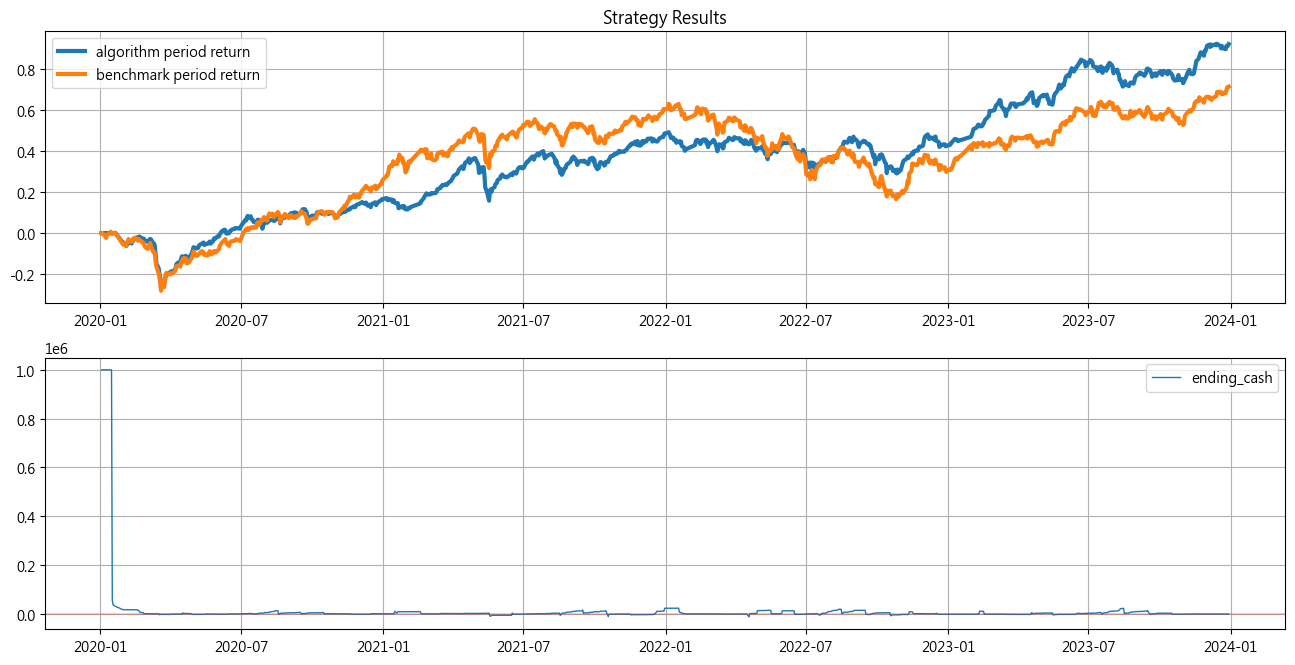

In [53]:
from zipline.algo.pipeline_algo import *

algo = TargetPercentPipeAlgo(
                     start_session=start_dt,
                     end_session=end_dt,
                     capital_base=1e6,                
                     tradeday=tradeday,
                     max_leverage=1,
                     slippage_model=slippage.VolumeShareSlippage(volume_limit=0.15, price_impact=0.01),
                     pipeline=compute_signals,
                     analyze=analyze,
                     custom_loader = Custom_loader
)

results = algo.run()

In [59]:
from zipline.utils.run_algo import get_transaction_detail

positions, transactions, orders = get_transaction_detail(results)

In [61]:
orders

,sid,symbol,id,dt,reason,created,amount,filled,commission,stop,limit,stop_reached,limit_reached,asset,status
2020-01-15 13:30:00+08:00,1539,6640,1c737ffad3e84816b44bf44e1b56856f,2020-01-15 13:30:00+08:00,None,2020-01-15 13:30:00+08:00,202,0,0.0,None,None,False,False,Equity(1539 [6640]),0
2020-01-15 13:30:00+08:00,522,2748,5cf337a09eb146f1a6c1185b93e43322,2020-01-15 13:30:00+08:00,None,2020-01-15 13:30:00+08:00,170,0,0.0,None,None,False,False,Equity(522 [2748]),0
2020-01-15 13:30:00+08:00,1546,6654,2ca074cfef6a4a50aec6aa2fe019ff78,2020-01-15 13:30:00+08:00,None,2020-01-15 13:30:00+08:00,156,0,0.0,None,None,False,False,Equity(1546 [6654]),0
2020-01-15 13:30:00+08:00,21,1232,c3c5181574994f7bab058bdb69d8bcf4,2020-01-15 13:30:00+08:00,None,2020-01-15 13:30:00+08:00,71,0,0.0,None,None,False,False,Equity(21 [1232]),0
2020-01-15 13:30:00+08:00,1045,4755,1dcf99e6e9204772a32a2abaa49ba7b5,2020-01-15 13:30:00+08:00,None,2020-01-15 13:30:00+08:00,175,0,0.0,None,None,False,False,Equity(1045 [4755]),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18 13:30:00+08:00,508,2722,67c07aa64c6a422795bd3d867207e099,2023-12-18 13:30:00+08:00,None,2023-12-15 13:30:00+08:00,-6,-6,22.0,None,None,False,False,Equity(508 [2722]),1
2023-12-18 13:30:00+08:00,1533,6613,e80fd2fb36864b43889169e7d63b1116,2023-12-18 13:30:00+08:00,None,2023-12-15 13:30:00+08:00,-4,-4,22.0,None,None,False,False,Equity(1533 [6613]),1
2023-12-19 13:30:00+08:00,1306,6144,86a109973c2d4a6c804ee0fe08a735f5,2023-12-19 13:30:00+08:00,None,2023-12-15 13:30:00+08:00,28,28,20.0,None,None,False,False,Equity(1306 [6144]),1
2023-12-19 13:30:00+08:00,505,2712,2ef31f1ab0fe4506bbf7bc4b93e5f32f,2023-12-19 13:30:00+08:00,None,2023-12-15 13:30:00+08:00,9,9,20.0,None,None,False,False,Equity(505 [2712]),1


Start date,2020-01-02
End date,2023-12-29
Total months,46
,Backtest
Annual return,17.299%
Cumulative returns,85.282%
Annual volatility,15.79%
Sharpe ratio,1.09
Calmar ratio,0.58
Stability,0.85
Max drawdown,-29.896%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.90,2020-01-20,2020-03-19,2020-06-24,102
1,16.91,2021-04-28,2021-05-17,2021-07-19,57
2,14.99,2022-01-04,2022-10-26,2023-02-16,270
3,7.35,2021-08-05,2021-08-19,2021-11-08,65
4,6.45,2023-07-03,2023-08-14,2023-11-21,98


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

Stress Events,mean,min,max
New Normal,0.07%,-7.13%,4.94%


Top 10 long positions of all time,max
sid,
4131,1.61%
3287,0.97%
3373,0.95%
4944,0.92%
5321,0.92%
4192,0.89%
3085,0.89%
5344,0.89%
1456,0.89%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
4131,1.61%
3287,0.97%
3373,0.95%
4944,0.92%
5321,0.92%
4192,0.89%
3085,0.89%
5344,0.89%
1456,0.89%


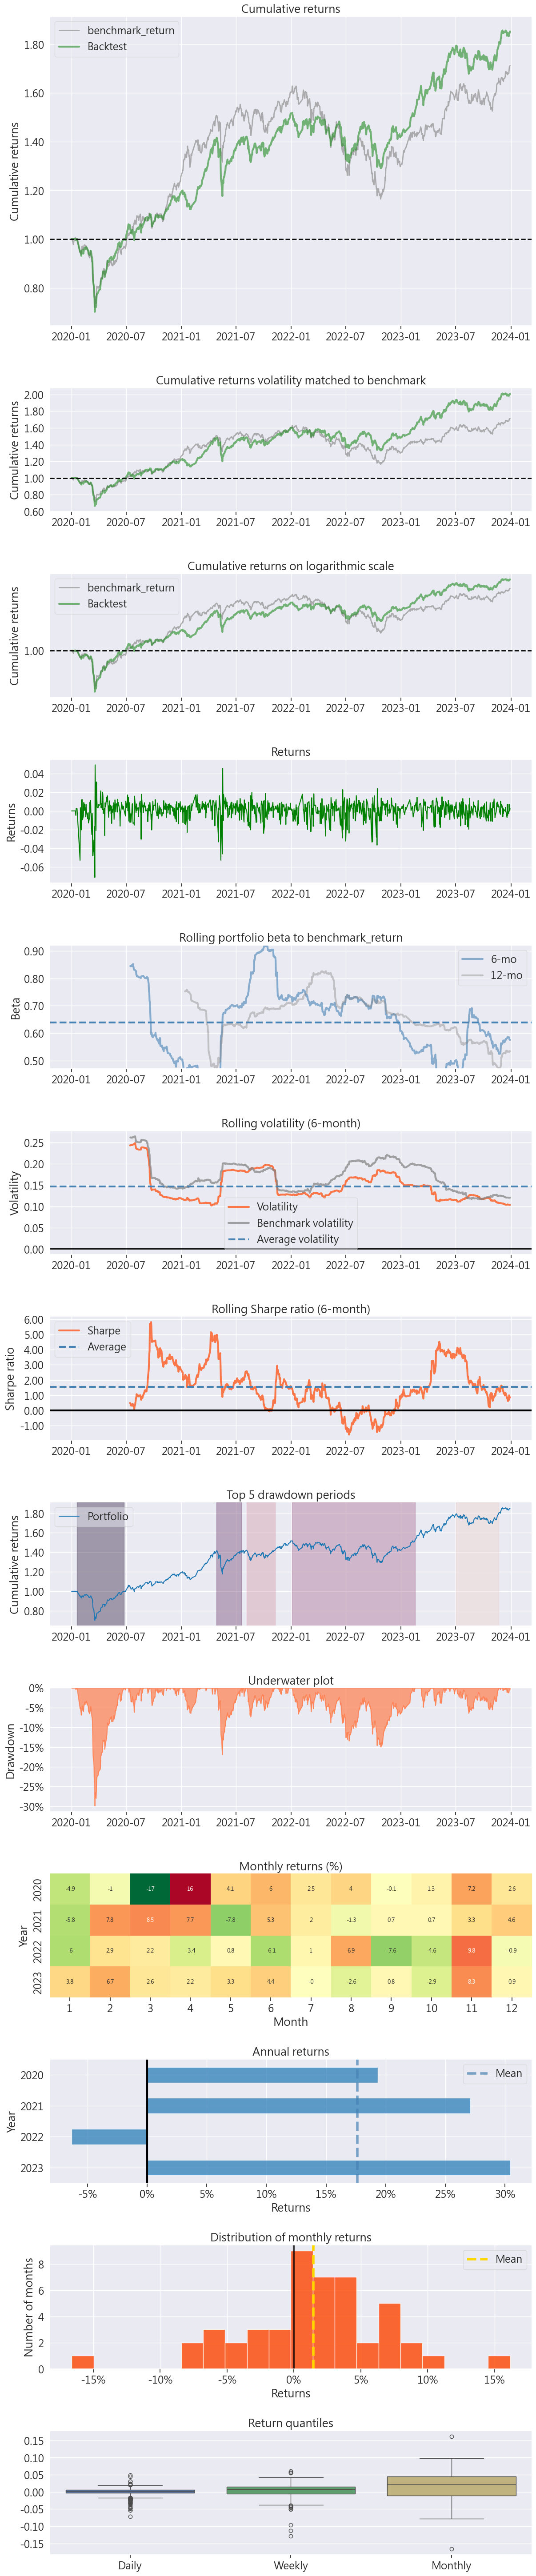

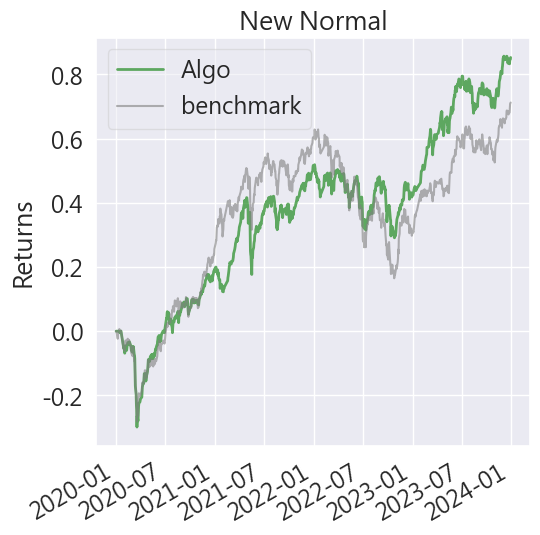

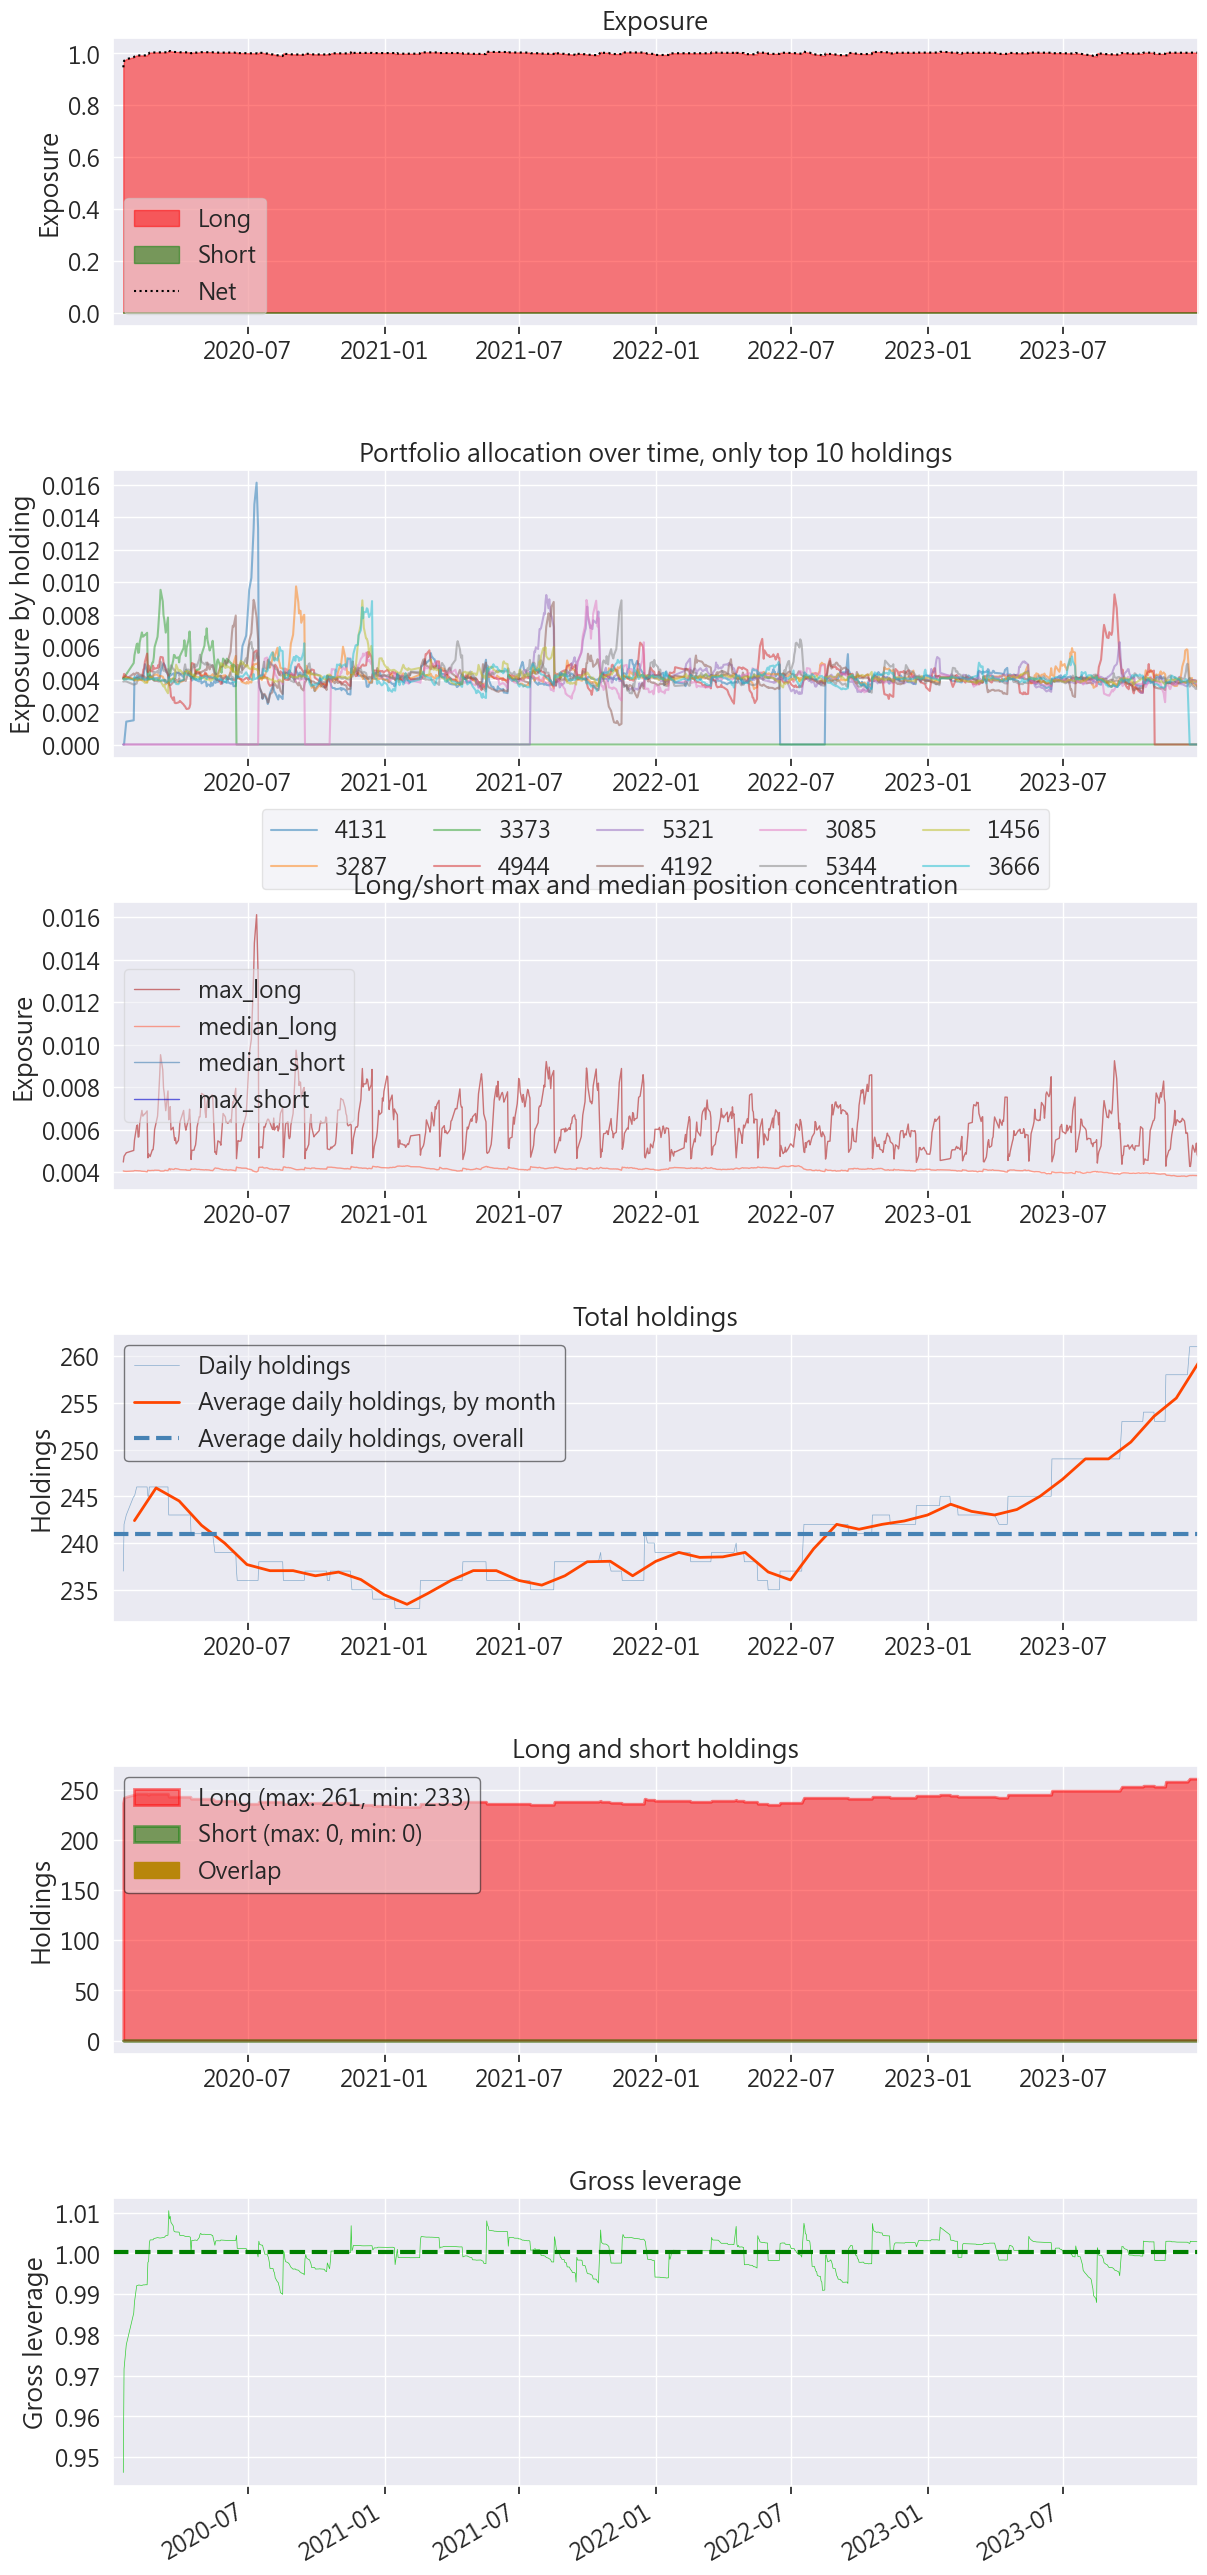

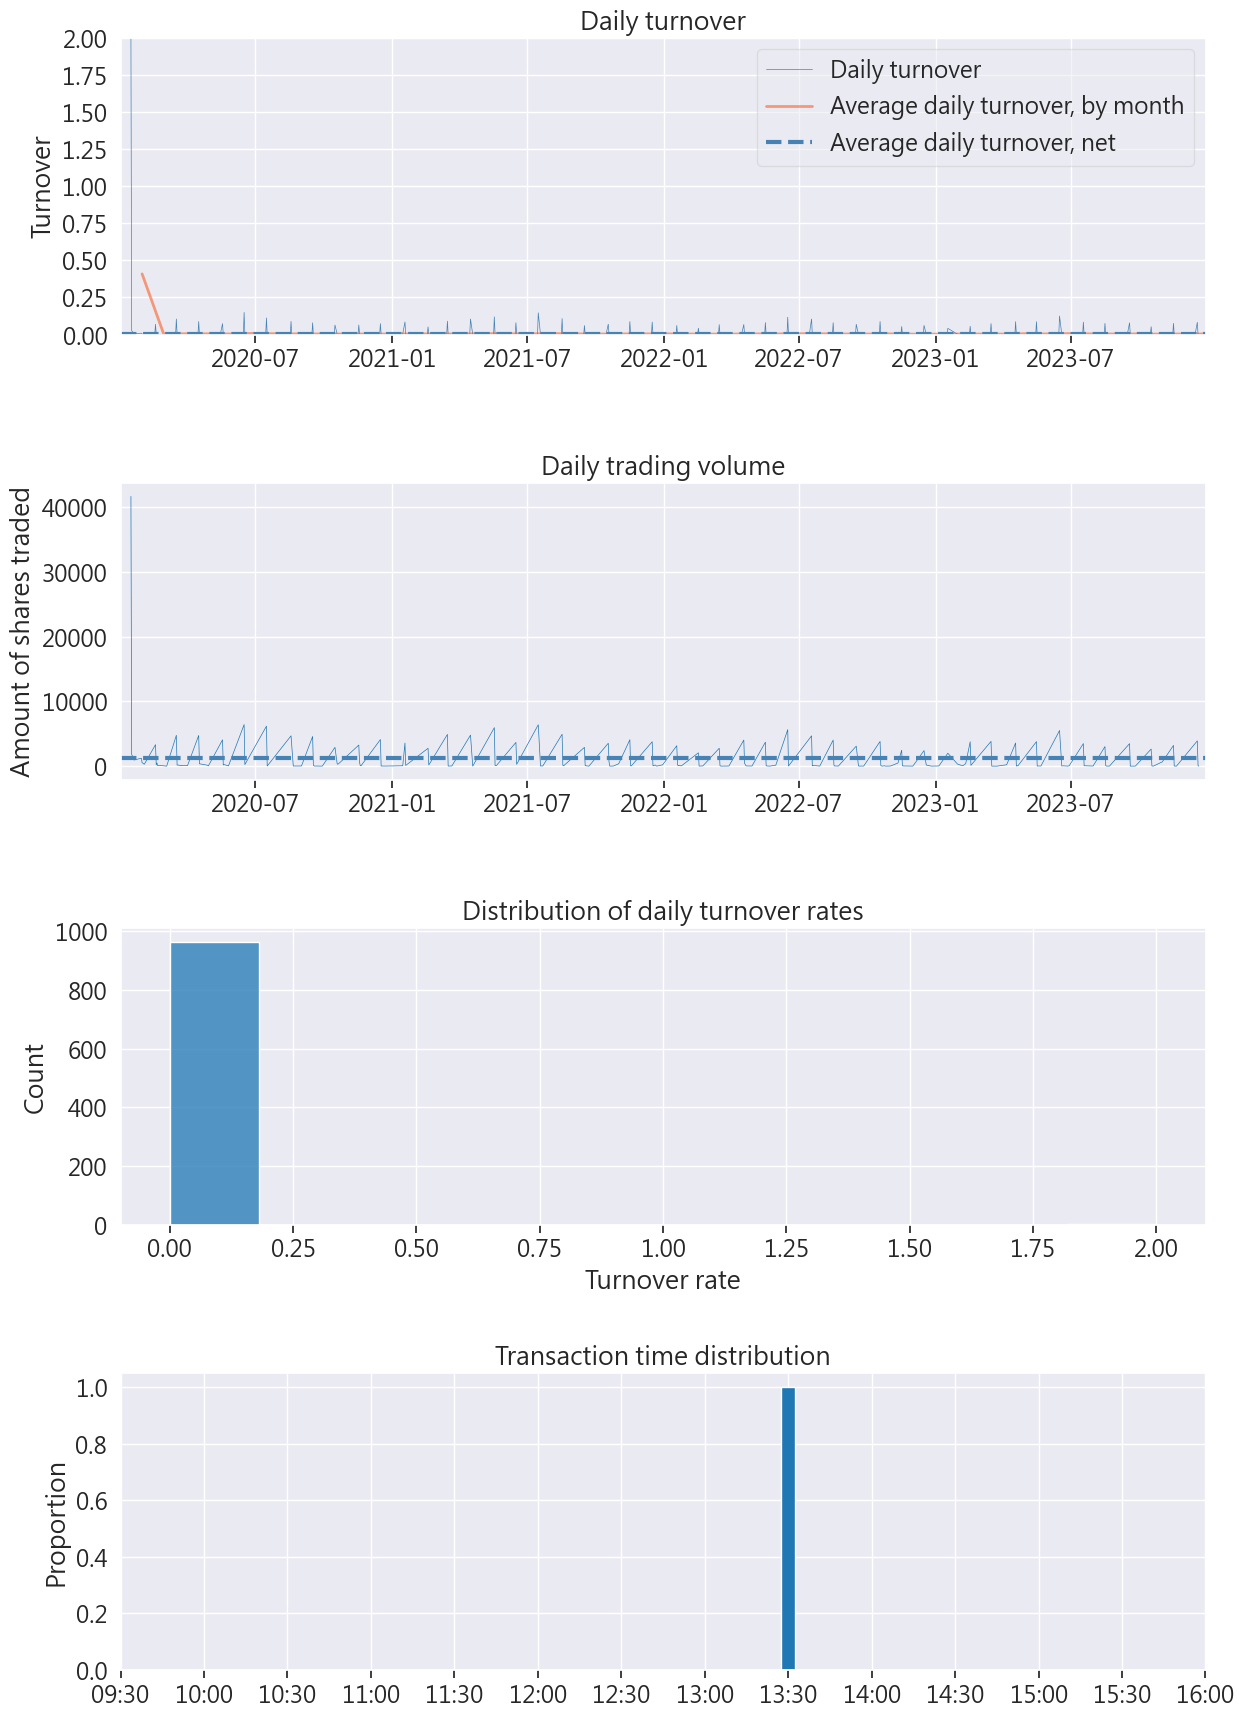

In [48]:
import pyfolio as pf

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# Creating a Full Tear Sheet
pf.create_full_tear_sheet(returns=returns,
                          positions=positions,
                          transactions=transactions,
                          benchmark_rets=benchmark_rets
                         )